## Instalar librerías requeridas

In [54]:
#Importar librerias necesarias
%pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Importar datos

In [55]:
import pandas as pd


# Cargar el dataset
url = "data/data.csv"
column_names = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]
data = pd.read_csv(url)
# Mostrar las primeras filas del dataset
print(data.head())



         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

## Preprocesamiento de Datos

In [56]:
# Sustituir 'M' por 1 y 'B' por 0 en la columna de Diagnosis
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Descartar la columna de ID
data.drop(columns=['id'], inplace=True)

# Verificar valores perdidos
print(data.isnull().sum())

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

## Análisis Exploratorio de Datos (EDA)

In [57]:
# Estadísticas descriptivas
print(data.describe())

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

## Gráfico de barras para categorizar Malignos y Benignos

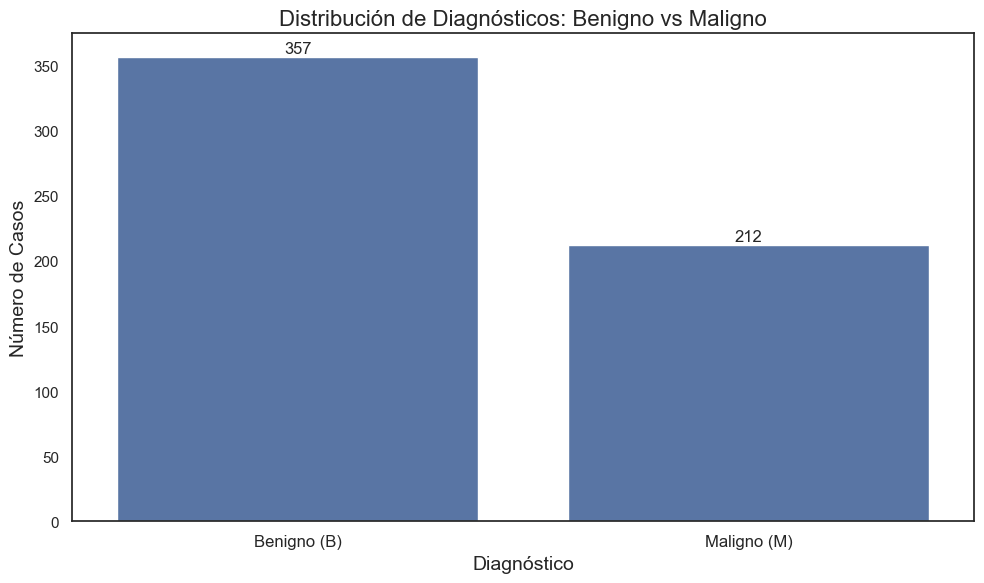

diagnosis
0    357
1    212
Name: count, dtype: int64


In [63]:
# Contar los casos benignos y malignos
diagnosis_counts = data['diagnosis'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values)

# Personalizar el gráfico
plt.title('Distribución de Diagnósticos: Benigno vs Maligno', fontsize=16)
plt.xlabel('Diagnóstico', fontsize=14)
plt.ylabel('Número de Casos', fontsize=14)
plt.xticks([0, 1], ['Benigno (B)', 'Maligno (M)'], fontsize=12)

# Añadir etiquetas de valor en las barras
for i, v in enumerate(diagnosis_counts.values):
    plt.text(i, v + 3, str(v), ha='center', fontsize=12)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

# Imprimir los valores exactos
print(diagnosis_counts)

## Correlación de todas las características

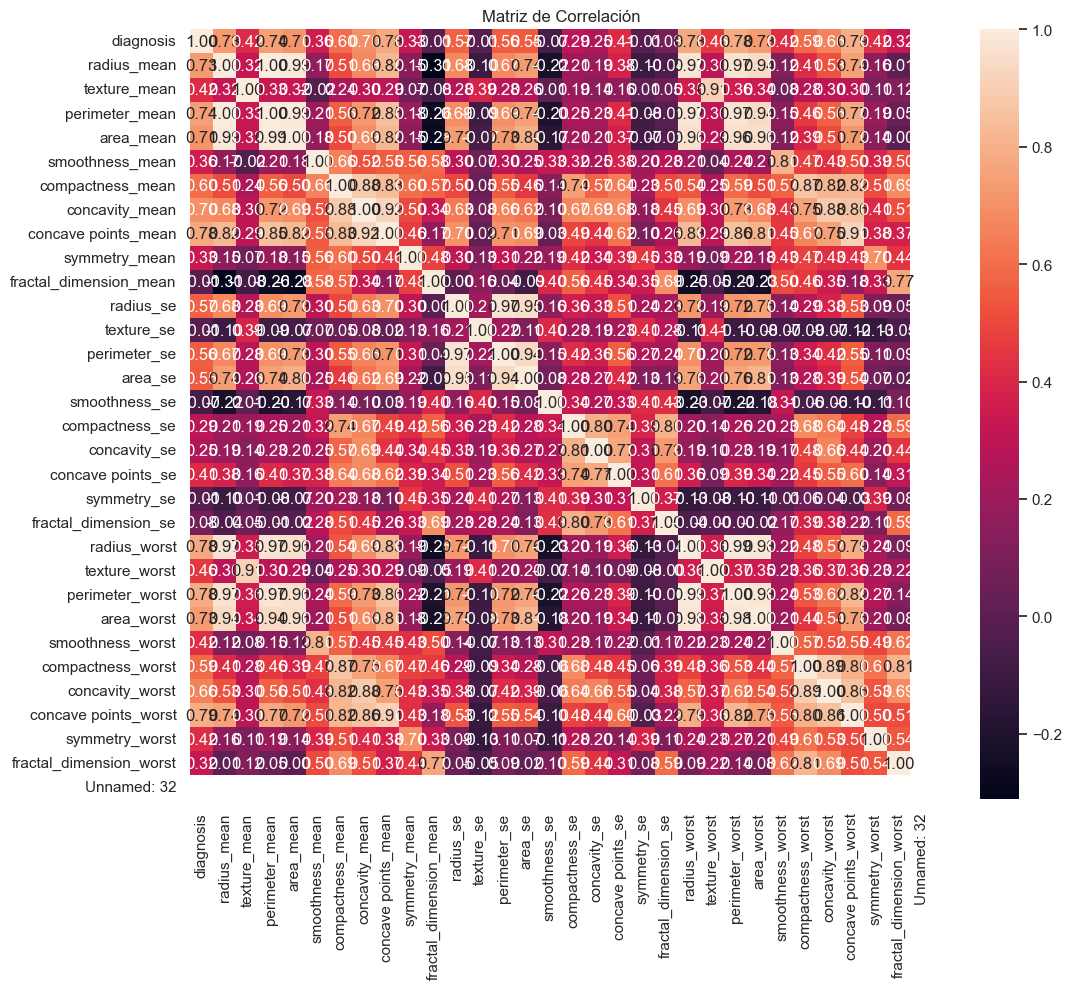

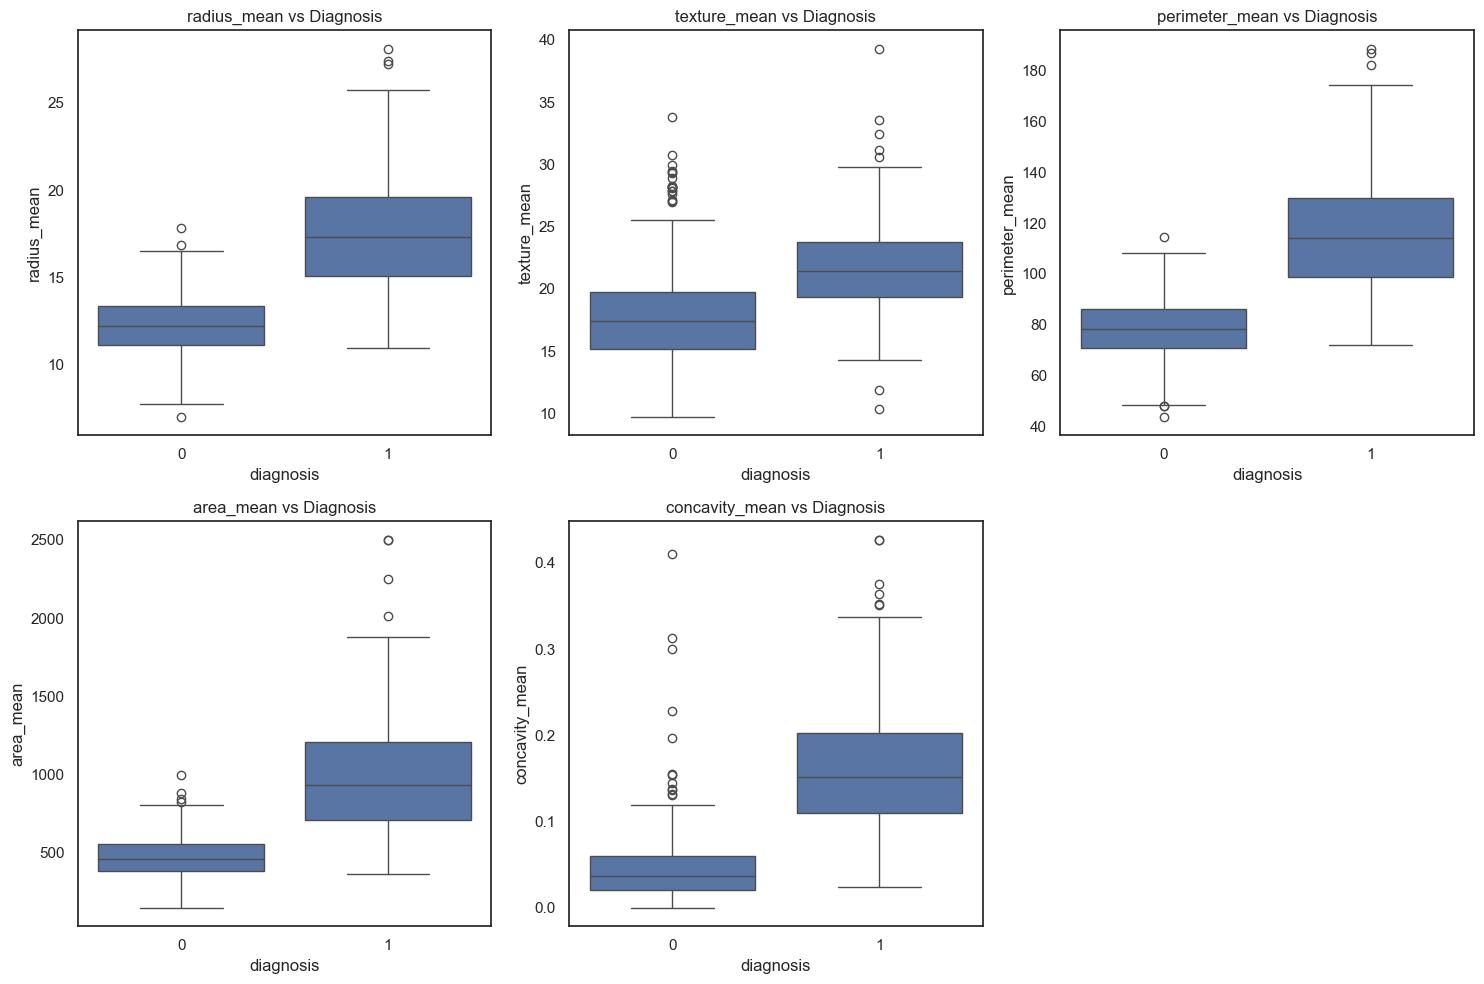

In [62]:
# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns


# Matriz de correlación de las características
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


# Seleccionar variables relevantes para visualización
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='diagnosis', y=feature, data=data)
    plt.title(f'{feature} vs Diagnosis')
plt.tight_layout()
plt.savefig('boxplots_features.png')
plt.show()
plt.close()




## Correlación ajustada a parametros más importantes

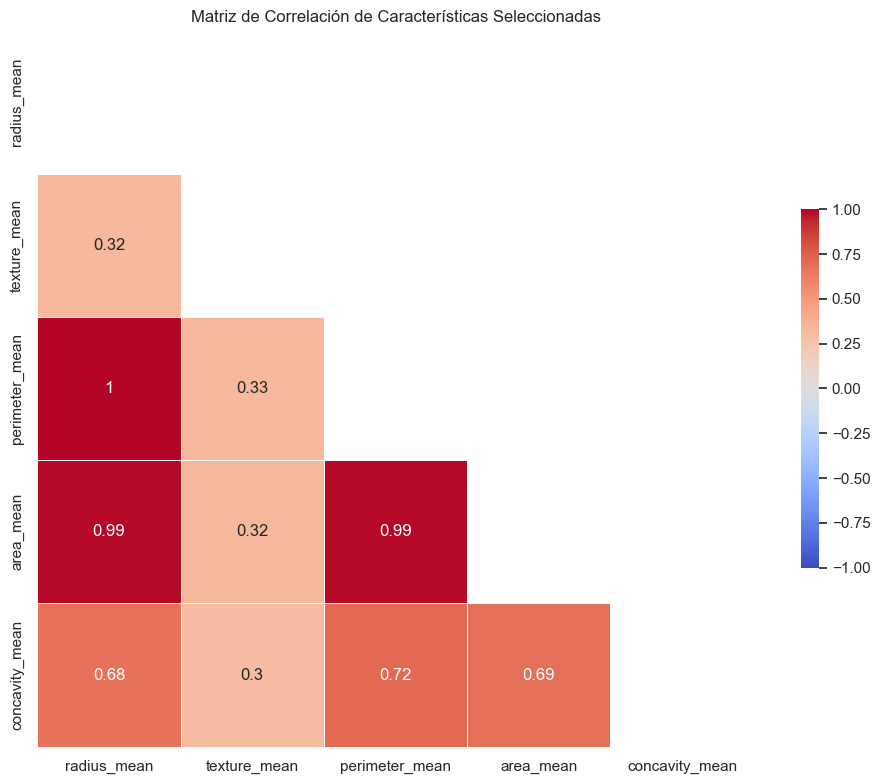

In [60]:
# Suponiendo que 'data' es tu DataFrame
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean']

# Crear la matriz de correlación
corr_matrix = data[features].corr()

# Crear una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Configurar el estilo de seaborn
sns.set(style="white")

# Crear la figura
plt.figure(figsize=(10, 8))

# Crear el heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Matriz de Correlación de Características Seleccionadas")
plt.tight_layout()
plt.show()

## Quitar valores atipicos

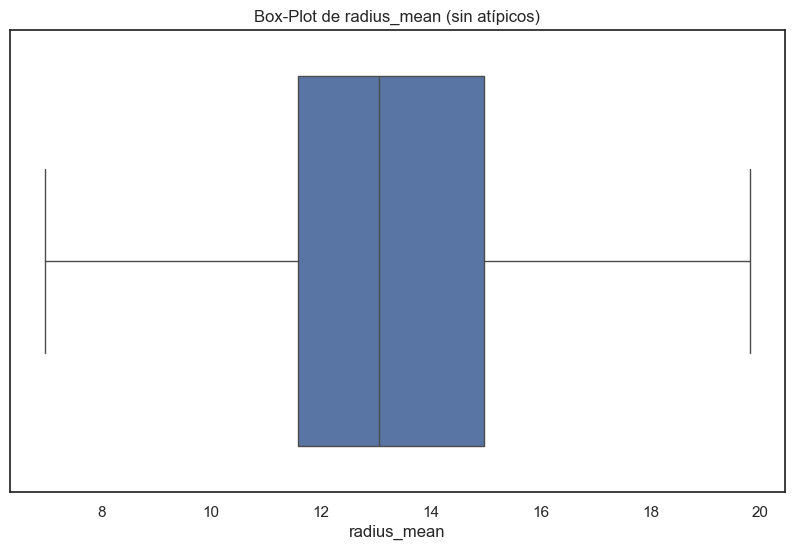

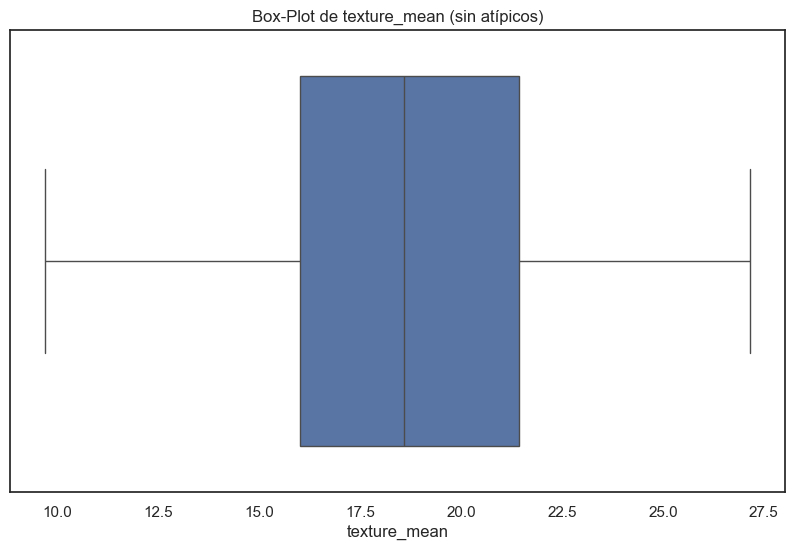

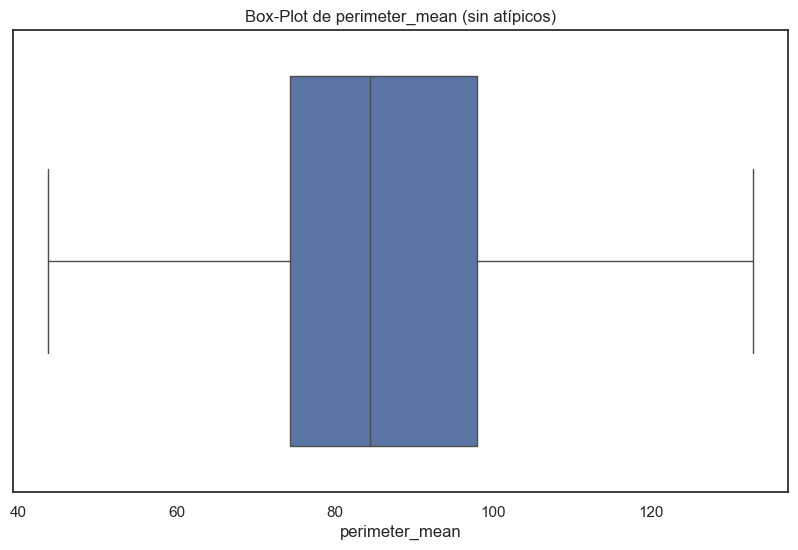

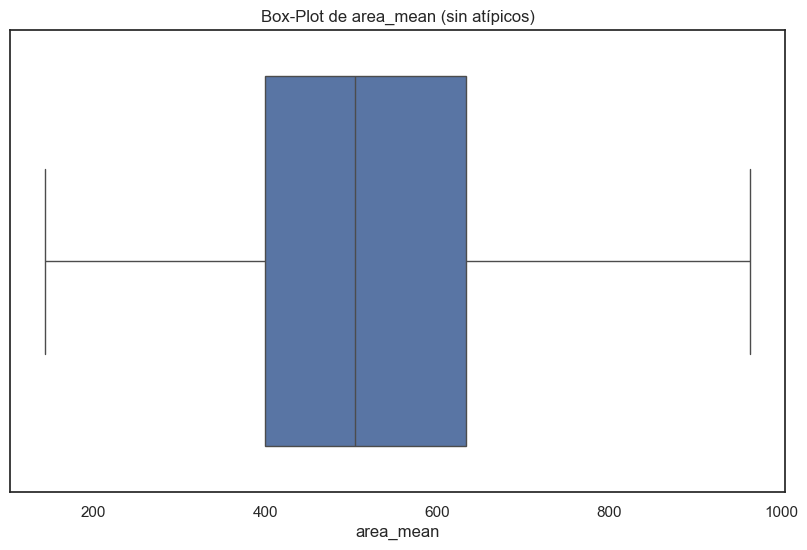

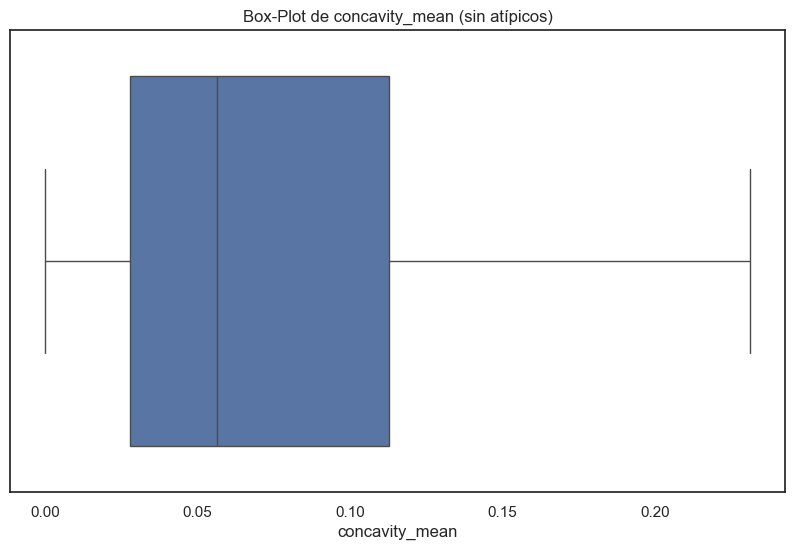

In [61]:
# Eliminar valores atípicos (filas)
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean']

Q1 = data['radius_mean'].quantile(0.25)
Q3 = data['radius_mean'].quantile(0.75)
IQR = Q3 - Q1 # rango intercuartil
limite_superior = Q3 + 1*IQR
limite_inferior = Q1 - 1.5*IQR

filtered_df = data[(data['radius_mean'] >= limite_inferior) & (data['radius_mean'] <= limite_superior)]

# Crear el box-plot de la variable "edad"
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df['radius_mean'])
plt.title('Box-Plot de radius_mean (sin atípicos)')
plt.xlabel('radius_mean')
plt.show()

dato = 'texture_mean'
Q1 = data[dato].quantile(0.25)
Q3 = data[dato].quantile(0.75)
IQR = Q3 - Q1 # rango intercuartil
limite_superior = Q3 + 1*IQR
limite_inferior = Q1 - 1.5*IQR

filtered_df = data[(data[dato] >= limite_inferior) & (data[dato] <= limite_superior)]

# Crear el box-plot de la variable "edad"
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df[dato])
plt.title(f'Box-Plot de {dato} (sin atípicos)')
plt.xlabel(dato)
plt.show()


dato = 'perimeter_mean'
Q1 = data[dato].quantile(0.25)
Q3 = data[dato].quantile(0.75)
IQR = Q3 - Q1 # rango intercuartil
limite_superior = Q3 + 1*IQR
limite_inferior = Q1 - 1.5*IQR

filtered_df = data[(data[dato] >= limite_inferior) & (data[dato] <= limite_superior)]

# Crear el box-plot de la variable "edad"
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df[dato])
plt.title(f'Box-Plot de {dato} (sin atípicos)')
plt.xlabel(dato)
plt.show()

dato = 'area_mean'
Q1 = data[dato].quantile(0.25)
Q3 = data[dato].quantile(0.75)
IQR = Q3 - Q1 # rango intercuartil
limite_superior = Q3 + 0.5*IQR
limite_inferior = Q1 - 1.5*IQR

filtered_df = data[(data[dato] >= limite_inferior) & (data[dato] <= limite_superior)]

# Crear el box-plot de la variable "edad"
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df[dato])
plt.title(f'Box-Plot de {dato} (sin atípicos)')
plt.xlabel(dato)
plt.show()

dato = 'concavity_mean'
Q1 = data[dato].quantile(0.25)
Q3 = data[dato].quantile(0.75)
IQR = Q3 - Q1 # rango intercuartil
limite_superior = Q3 + 1*IQR
limite_inferior = Q1 - 1.5*IQR

filtered_df = data[(data[dato] >= limite_inferior) & (data[dato] <= limite_superior)]

# Crear el box-plot de la variable "edad"
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df[dato])
plt.title(f'Box-Plot de {dato} (sin atípicos)')
plt.xlabel(dato)
plt.show()


